# Final report code

## *Importing libraries*

In [52]:
import gzip
import json
import string
import re
import seaborn as sns
import matplotlib as plt

import pandas as pd
import plotly

from collections import Counter
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer

## *Analyzing listings.csv*

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132]),
 [Text(0, 0, 'capitol heights'),
  Text(1, 0, 'evergreen park'),
  Text(2, 0, 'bedstuy'),
  Text(3, 0, 'longislandcity'),
  Text(4, 0, 'calumet park'),
  Text(5, 0, 'aurora'),
  Text(6, 0, 'lawrence'),
  Text(7, 0, 'hollis'),
  Text(8, 0, 'engle

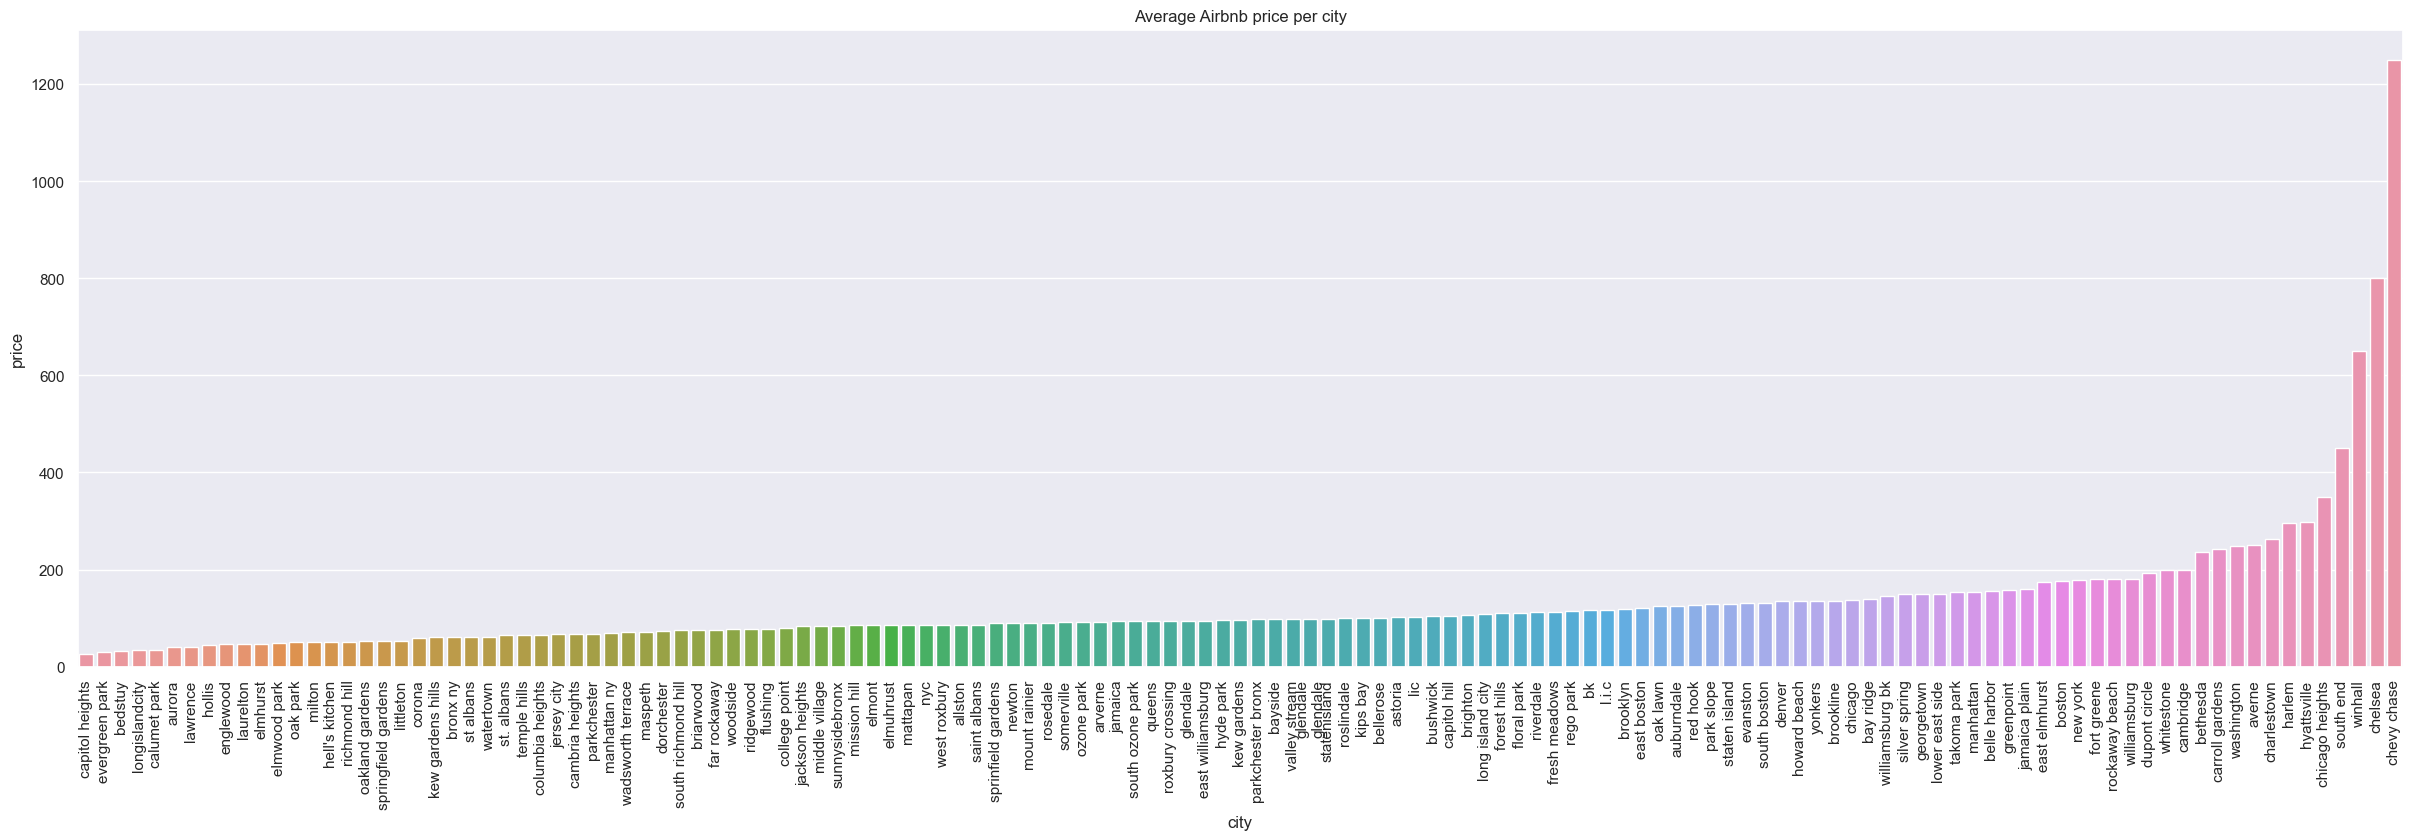

In [53]:
listingsDF = pd.read_csv("datasets/listings.csv")
listingsDF = listingsDF[listingsDF["price"].notna()]
listingsDF = listingsDF[listingsDF["price"].notnull()]
listingsDF2 = listingsDF.groupby(by="city").mean().reset_index().sort_values(by=["price"])
listingsDF3 = listingsDF2
sns.set(rc={'figure.figsize':(30,8.27)})
sns.barplot(data=listingsDF2,x="city",y="price").set(title="Average Airbnb price per city")
plt.pyplot.xticks(rotation=90)

[Text(0.5, 1.0, 'Airbnb price for Chevy Chase')]

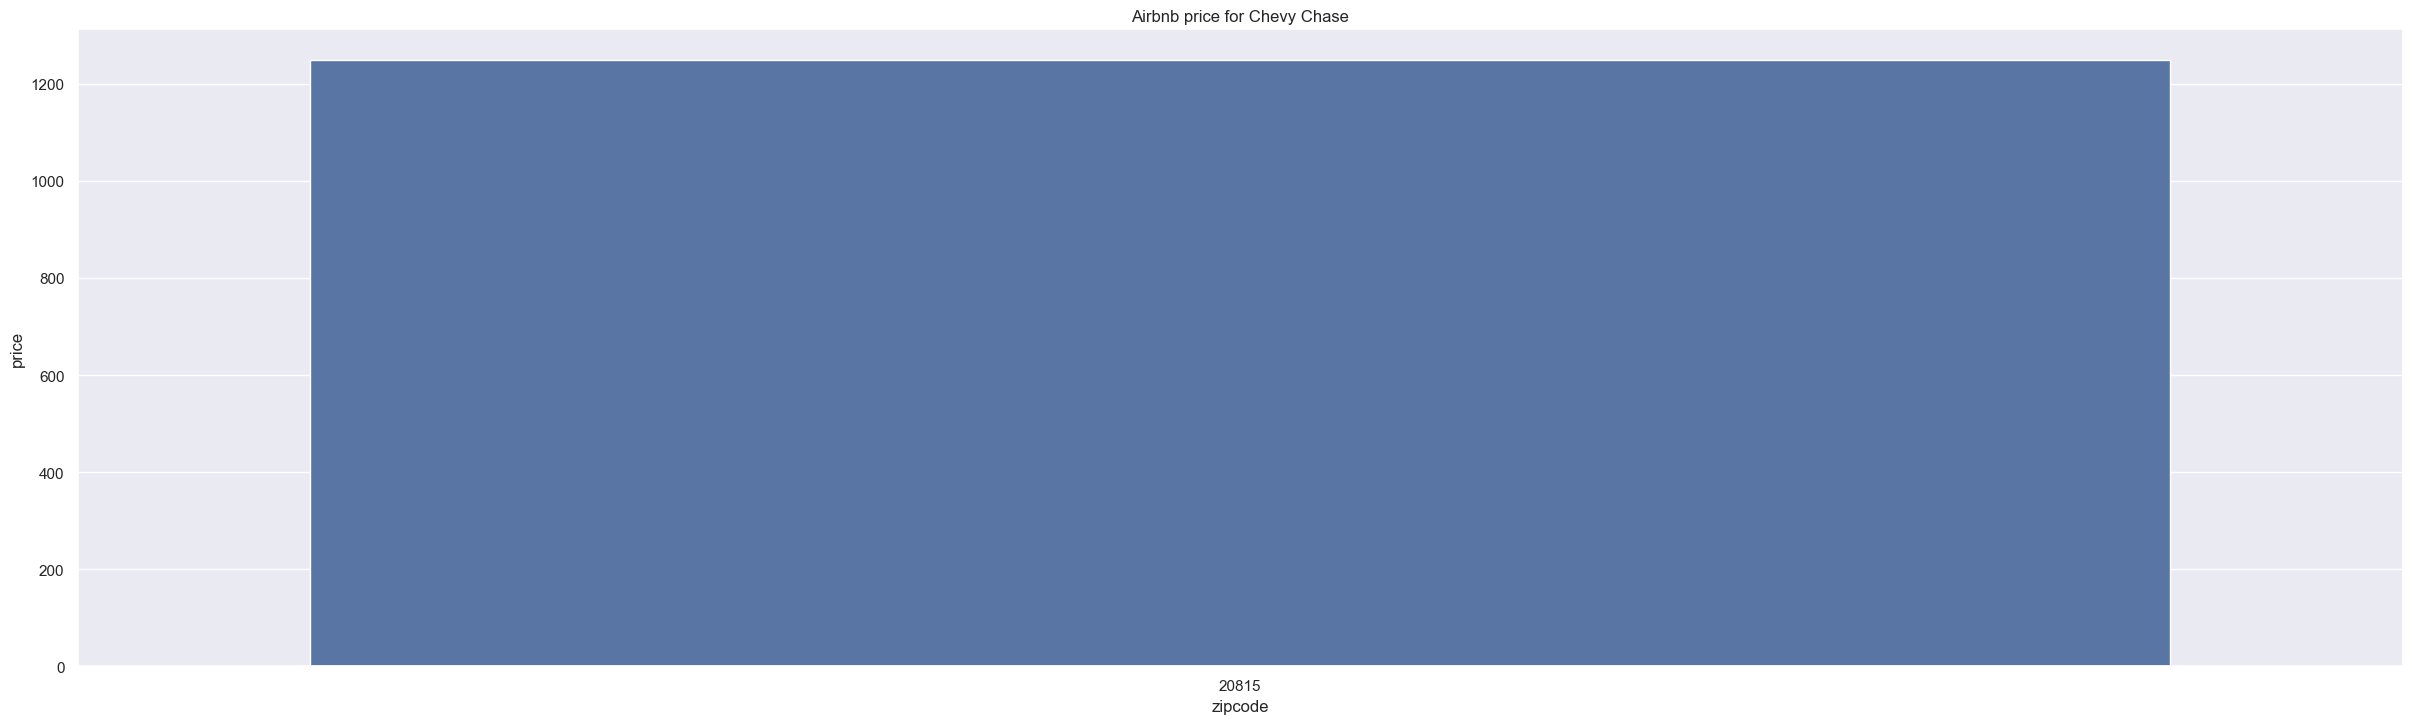

In [54]:
listingsDF = listingsDF[listingsDF["city"].notna()]
listingsDF = listingsDF[listingsDF["city"].notnull()]
listingsDF2 = listingsDF[listingsDF['city'].str.contains("chevy chase")]
sns.barplot(data=listingsDF2,x="zipcode",y="price").set(title="Airbnb price for Chevy Chase")

       accommodates                                          amenities  \
53177           2.0  {TV,Internet,"Wireless Internet","Air conditio...   
54489           4.0  {Internet,"Wireless Internet","Air conditionin...   
54496           2.0  {Internet,"Wireless Internet","Air conditionin...   
54501           1.0  {Internet,"Wireless Internet","Air conditionin...   
54512           1.0  {Internet,"Wireless Internet","Air conditionin...   
54523           1.0  {Internet,"Wireless Internet","Air conditionin...   
54524           1.0  {Internet,"Wireless Internet","Air conditionin...   
54537          11.0  {"Wireless Internet","Air conditioning","Free ...   
54538           1.0  {Internet,"Wireless Internet","Air conditionin...   
54540           2.0  {Internet,"Wireless Internet","Air conditionin...   
59823           2.0  {TV,Internet,"Wireless Internet","Air conditio...   

       availability_30  bathrooms  bed_type  bedrooms  beds  \
53177               30        1.0    Airbed     

[Text(0.5, 1.0, 'Airbnb price for Capitol Heights')]

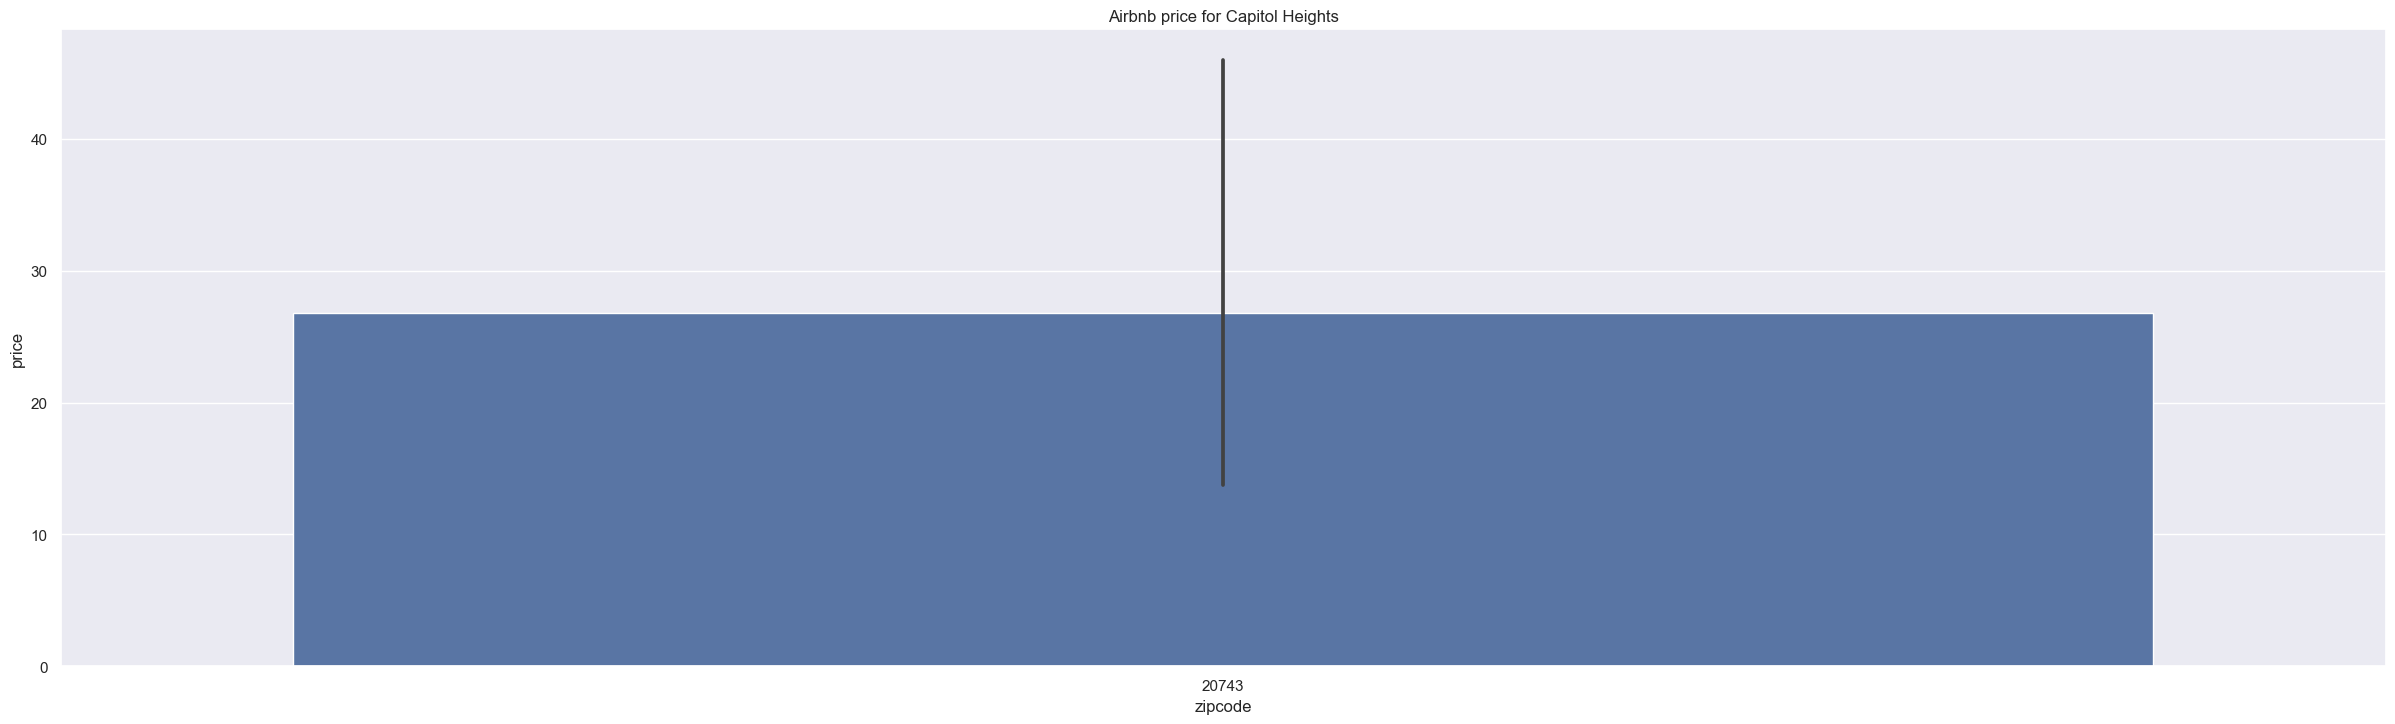

In [55]:
listingsDF2 = listingsDF[listingsDF['city'].str.contains("capitol heights")]
print(listingsDF2)
sns.barplot(data=listingsDF2,x="zipcode",y="price").set(title="Airbnb price for Capitol Heights")

## *Analyzing demographics.csv*

C:\Users\David\AppData\Local\Temp\ipykernel_12868\2168716867.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingsDF2["zipcode"] = listingsDF2["zipcode"].astype(int)
C:\Users\David\AppData\Local\Temp\ipykernel_12868\2168716867.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographicsDF2["mean_household_income"] = demographicsDF2["mean_household_income"].astype(int)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 [Text(0, 0, 'bronx ny'),
  Text(1, 0, 'calumet park'),
  Text(2, 0, 'bedstuy'),
  Text(3, 0, 'mission hill'),
  Text(4, 0, 'roxbury crossing'),
  Text(5, 0, 'sunnysidebronx'),
  Text(6, 0, 'chicago heights'),
  Text(7, 0, 'mattapan'),
  Text(8, 0, 'corona'),
  Text(9, 0, 'far rockaway'),
  Text(10, 0, 'parkchester'),
  Text(11, 0, 'parkchester

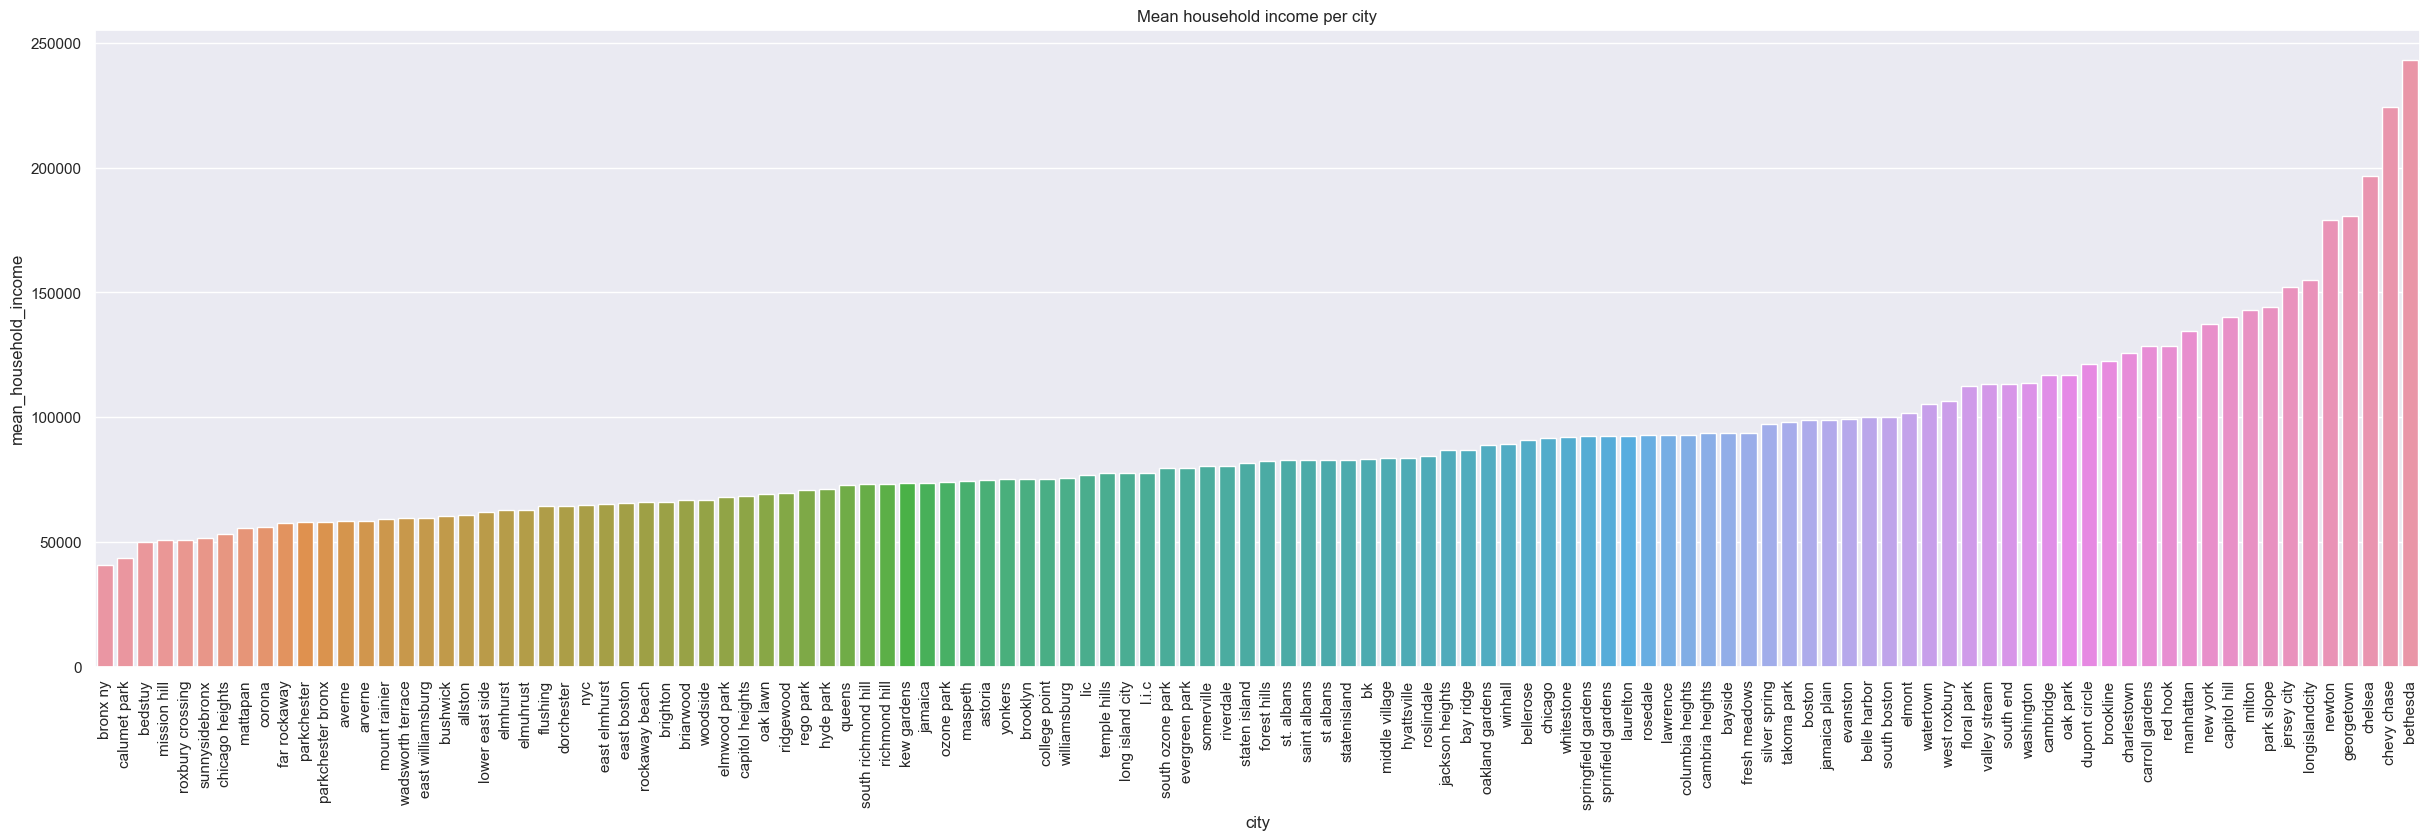

In [70]:
demographicsDF = pd.read_csv("datasets/demographics.csv")
demographicsDF3 = demographicsDF
realEstateDF = pd.read_csv("datasets/real_estate.csv.gz",compression='gzip')
realEstateDF = realEstateDF[["zipcode","city"]]
listingsDF = listingsDF[listingsDF["zipcode"].notna()]
listingsDF = listingsDF[listingsDF["zipcode"].notnull()]
listingsDF = listingsDF[listingsDF["zipcode"].str.isnumeric()]
listingsDF2 = listingsDF[["city","zipcode"]]
listingsDF2["zipcode"] = listingsDF2["zipcode"].astype(int)

demographicsDF = demographicsDF.merge(listingsDF2,on=['zipcode'])
demographicsDF = demographicsDF[demographicsDF["mean_household_income"].str.isnumeric()]
demographicsDF = demographicsDF[demographicsDF["city"].isin(list(listingsDF2["city"]))]

demographicsDF2 = demographicsDF[["city","mean_household_income"]]
demographicsDF2["mean_household_income"] = demographicsDF2["mean_household_income"].astype(int)
demographicsDF2 = demographicsDF2.groupby(by="city").mean().sort_values(by=["mean_household_income"]).reset_index()

sns.set(rc={'figure.figsize':(30,8.27)})
sns.barplot(data=demographicsDF2,x="city",y="mean_household_income").set(title="Mean household income per city")
plt.pyplot.xticks(rotation=90)


C:\Users\David\AppData\Local\Temp\ipykernel_12868\3164617871.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographicsDF2["median_household_income"] = demographicsDF2["median_household_income"].astype(int)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 [Text(0, 0, 'bronx ny'),
  Text(1, 0, 'roxbury crossing'),
  Text(2, 0, 'mission hill'),
  Text(3, 0, 'calumet park'),
  Text(4, 0, 'lower east side'),
  Text(5, 0, 'bedstuy'),
  Text(6, 0, 'sunnysidebronx'),
  Text(7, 0, 'chicago heights'),
  Text(8, 0, 'nyc'),
  Text(9, 0, 'arverne'),
  Text(10, 0, 'averne'),
  Text(11, 0, 'east williamsburg

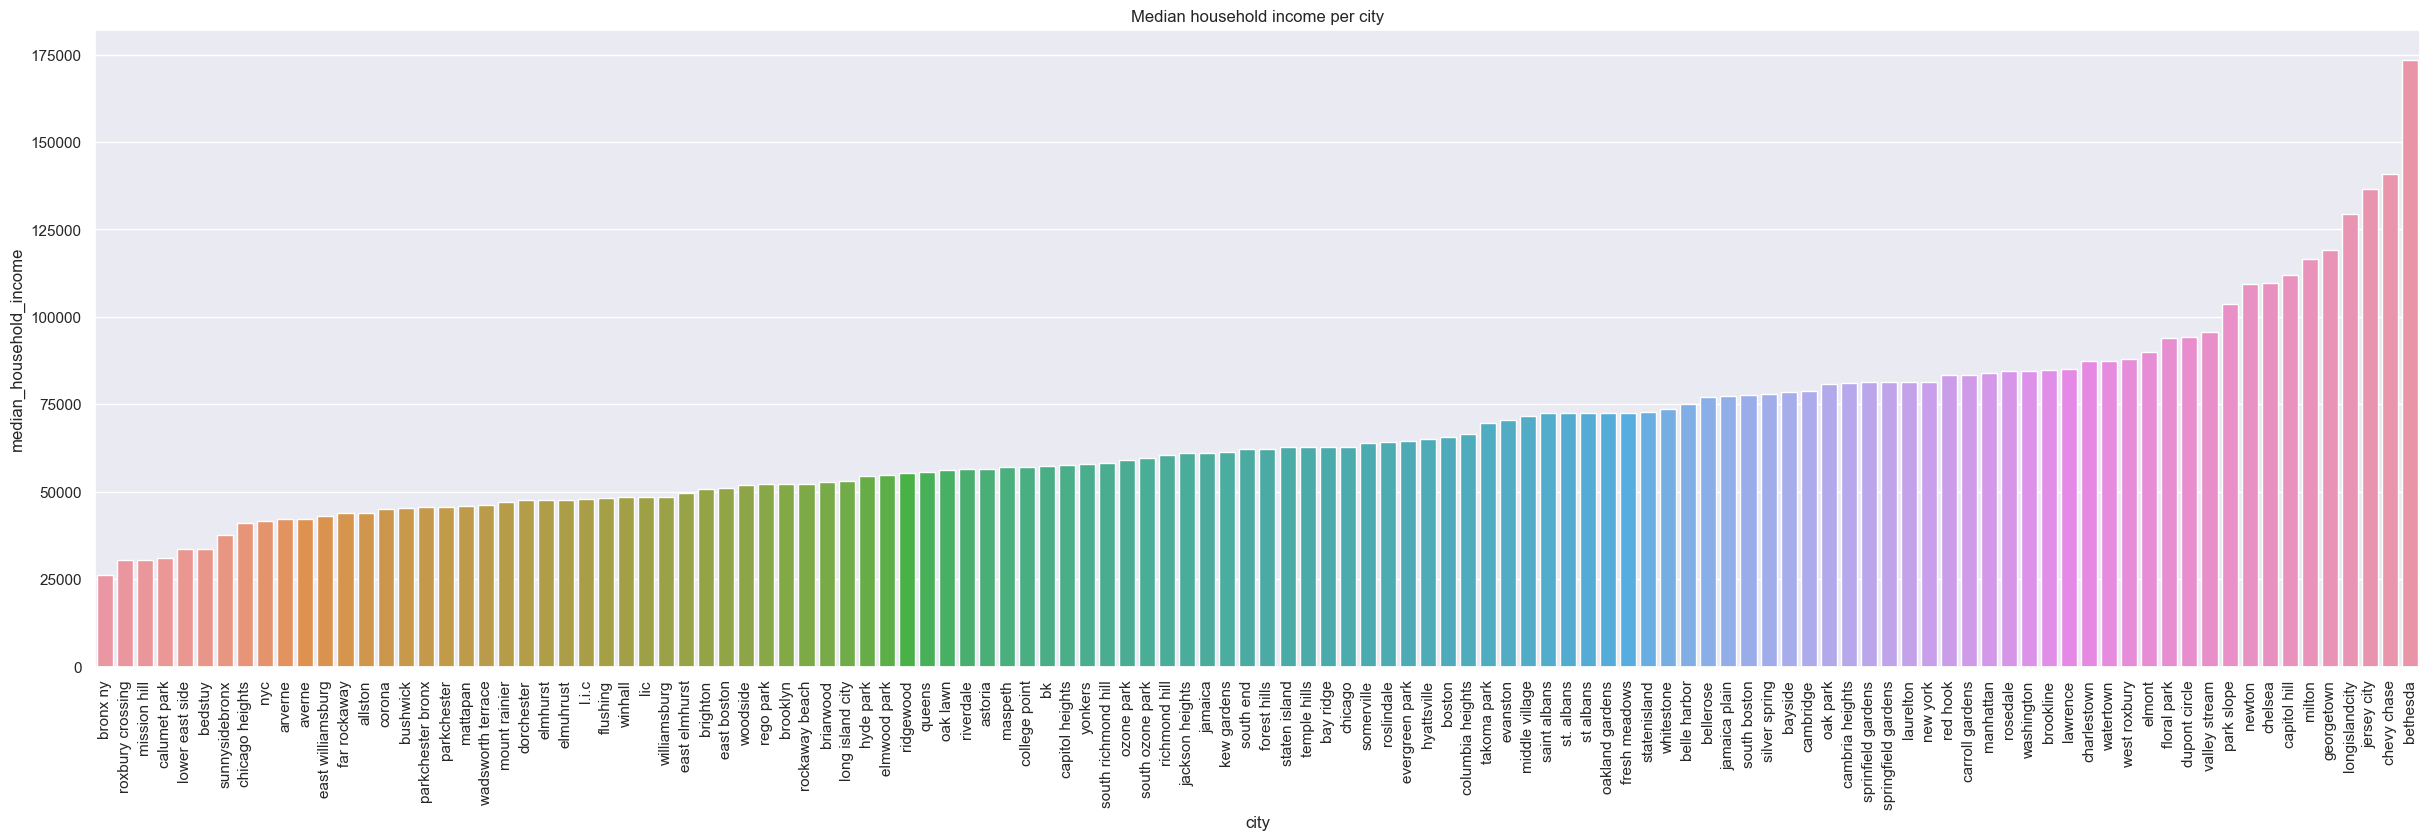

In [71]:
demographicsDF = demographicsDF3

demographicsDF = demographicsDF.merge(listingsDF2,on=['zipcode'])
demographicsDF = demographicsDF[demographicsDF["median_household_income"].str.isnumeric()]
demographicsDF = demographicsDF[demographicsDF["city"].isin(list(listingsDF2["city"]))]

demographicsDF2 = demographicsDF[["city","median_household_income"]]
demographicsDF2["median_household_income"] = demographicsDF2["median_household_income"].astype(int)
demographicsDF2 = demographicsDF2.groupby(by="city").mean().sort_values(by=["median_household_income"]).reset_index()

sns.set(rc={'figure.figsize':(30,8.27)})
sns.barplot(data=demographicsDF2,x="city",y="median_household_income").set(title="Median household income per city")
plt.pyplot.xticks(rotation=90)